In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import spacy
#nlp=spacy.load('en',disable=['parser','tagger','ner'])

In [2]:
df = pd.read_csv("root.csv")

In [3]:
df.head(10)

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
5,agarwal head bank,Blockchain
6,several data security regulatory oversight wou...,Blockchain
7,relevance transaction register available publi...,Blockchain
8,technology need transaction intermediary clear...,Blockchain
9,seven bank morgan chase already support certai...,Blockchain


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
Text      22701 non-null object
Target    22704 non-null object
dtypes: object(2)
memory usage: 354.9+ KB


In [5]:
df.describe()

,Text,Target
count,22701,22704
unique,20986,11
top,billion,FinTech
freq,41,8551


In [6]:
df.isnull().sum()

Text      3
Target    0
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
#from sklearn.feature_extraction.text import CountVectorizer

In [9]:
df.Target.unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

In [10]:
df.Target = df.Target.replace(to_replace= [ 'Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'] , value = [0,1,2,3,4,5,6,7,8,9,10])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(stop_words = 'english')
X = tfidfconverter.fit_transform(df.Text).toarray()

In [12]:
features = X

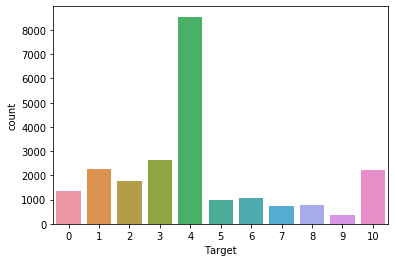

In [13]:
sns.countplot(df.Target,data=df)

In [14]:
from tensorflow import keras 
Y = keras.utils.to_categorical(df.Target, num_classes = 11)
shape = features.shape

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, Y , test_size=0.33, random_state=42,shuffle=True)




In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Dense(1000 , activation = "relu" , input_dim= shape[1]))

model.add(Dropout(0.2))

model.add(Dense(600 , activation = "relu" ))



model.add(Dense(400 , activation = "relu" ))

model.add(Dropout(0.2))


model.add(Dense(250 , activation = "relu" ))

model.add(Dropout(0.2))

model.add(Dense(200 , activation = "relu" ))

model.add(Dropout(0.2))

model.add(Dense(100, activation = 'relu'))

model.add(Dense(50, activation= 'relu'))

model.add(Dense(11 , activation = 'softmax'))


model.compile(optimizer = 'adam' , loss='categorical_crossentropy' , metrics =['accuracy'])

model.summary()
          
          
          

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              11203000  
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 600)               600600    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               240400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               100250    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

call = EarlyStopping(monitor= 'val_accuracy' , patience = 2)
model.fit(x_train , y_train ,epochs = 10 ,
          validation_data = (x_test,y_test),
          batch_size = 128 , callbacks = [call],verbose=1)

Train on 15209 samples, validate on 7492 samples
Epoch 1/10
15209/15209 [==============================] - 86s 6ms/sample - loss: 1.9417 - accuracy: 0.3778 - val_loss: 1.7452 - val_accuracy: 0.4581
Epoch 2/10
15209/15209 [==============================] - 35s 2ms/sample - loss: 1.3128 - accuracy: 0.5741 - val_loss: 1.3909 - val_accuracy: 0.5878
Epoch 3/10
15209/15209 [==============================] - 34s 2ms/sample - loss: 0.8217 - accuracy: 0.7242 - val_loss: 1.4391 - val_accuracy: 0.5930
Epoch 4/10
15209/15209 [==============================] - 35s 2ms/sample - loss: 0.4865 - accuracy: 0.8423 - val_loss: 1.4138 - val_accuracy: 0.6009
Epoch 5/10
15209/15209 [==============================] - 34s 2ms/sample - loss: 0.2874 - accuracy: 0.9124 - val_loss: 1.7377 - val_accuracy: 0.6030
Epoch 6/10
15209/15209 [==============================] - 33s 2ms/sample - loss: 0.1666 - accuracy: 0.9496 - val_loss: 1.8460 - val_accuracy: 0.6304
Epoch 7/10
15209/15209 [==============================] -

In [20]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

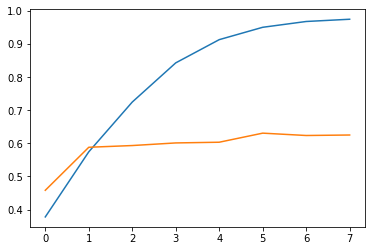

In [21]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.show()

In [40]:
n=11300
print(model.predict_classes(np.reshape(X[n], (1,X.shape[1]))))
print(df.Target[n])

[4]
4


1